# EAGE 2020 abstract, Figures 4 & 5

Time-domain CSEM using Laplace-domain calculation with FFTLog.

In [1]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Model

In [3]:
zsrc = 150          # Source horizontally at the origin at 150 m depth.
zrec = 200          # Receiver inline at 200 m depth.
offset = 2000       # Offset is 2 km.
res = 1             # Horizontal resistivity 1 Ohm.m.
aniso = np.sqrt(1)  # Anisotropy of sqrt(2).

# Collect model input for analytical solutions.
model = {
    'src': [0, 0, zsrc],
    'rec': [offset, 0, zrec],
    'res': res,
    'aniso': aniso,
    'verb': 1
}

times = np.linspace(0.001, 1.5, 301)
signal = 0  # Impulse response

## Analytical time-domain result

In [4]:
out_ta = empymod.analytical(freqtime=times, solution='dhs', signal=signal, **model)

## Laplace-domain calculations

### Load Laplace-filter derived from analytical x-s and x-t functions and diffusion function.

In [5]:
filt = empymod.filters.DigitalFilter('lap_201_empy3', filter_coeff=['lap'])
filt.fromfile()

### Plot filter values

<IPython.core.display.Javascript object>


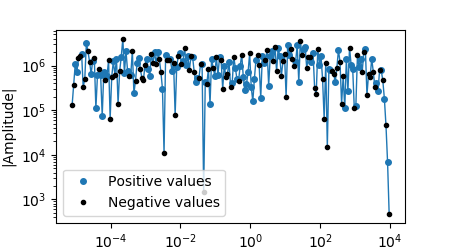

In [6]:
plt.figure(figsize=(4.5, 2.5))

plt.plot(filt.base, abs(filt.lap), '-', lw=1)
plt.plot(filt.base, filt.lap, 'C0o', ms=4, label="Positive values")
plt.plot(filt.base, -filt.lap, 'k.', label="Negative values")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Base')
plt.ylabel('|Amplitude|')

plt.legend()
# plt.savefig('../figures/filter-space.pdf', bbox_inches='tight')
plt.show()

## Space-Laplace calculation

In [7]:
pts_per_dec = -1  # Lagged Convolution DLF
kind = 'lap'      # Laplace-domain DLF

# Calculate required s-values {filt.base/times[:, None]}
req_s, _ = empymod.transform.get_spline_values(filt, times, pts_per_dec)
req_s = np.squeeze(req_s)

# Calculate corresponding values in the x-s-domain
req_la = empymod.analytical(freqtime=-req_s, solution='dhs', **model)  # Analytically

## Multiply middle value by 1.00001 for error function

In [8]:
req_le = req_la.copy()
req_le[req_le.size//2] *= 1+1e-5

In [9]:
print(f"Change Laplace value s_c :: {req_s[req_le.size//2]}")
print(f"Analytical value at s_c  :: {req_la[req_le.size//2]}")
print(f"Value with error at s_c  :: {req_le[req_le.size//2]}")

Change Laplace value s_c :: 7.043004761974903
Analytical value at s_c  :: 7.742390092894834e-12
Value with error at s_c  :: 7.742467516795763e-12


### DLF $x\mathrm{-}s \Rightarrow x\mathrm{-}t$

Carry out DLF {np.dot(req_la, filt.lap)/times}

In [10]:
out_tla = empymod.transform.dlf(req_la, req_s, times, filt, pts_per_dec, kind=kind)
out_tle = empymod.transform.dlf(req_le, req_s, times, filt, pts_per_dec, kind=kind)

## Figure

<IPython.core.display.Javascript object>


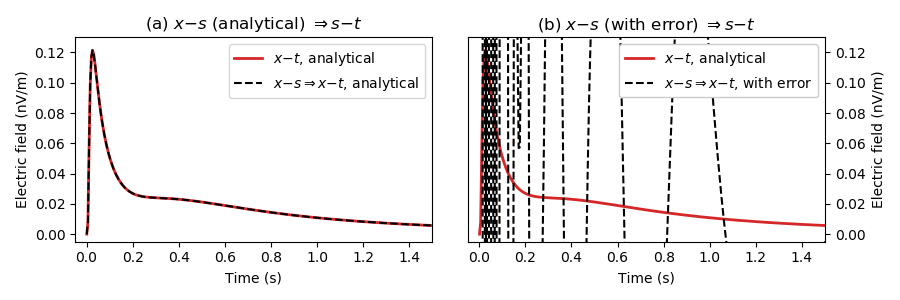

In [11]:
fig = plt.figure(figsize=(9, 3))

ax1 = plt.subplot(121)
plt.title('(a) $x\mathrm{-}s$ (analytical) $\Rightarrow s\mathrm{-}t$')
plt.plot(times, out_ta*1e9, 'C3', lw=2, label='$x\mathrm{-}t$, analytical')
plt.plot(times, out_tla*1e9, 'k--', label='$x\mathrm{-}s\Rightarrow x\mathrm{-}t$, analytical')
plt.xlim([-0.05, 1.5])
plt.ylabel('Electric field (nV/m)')
plt.xlabel('Time (s)')
plt.legend()

ax2 = plt.subplot(122, sharey=ax1)
plt.title('(b) $x\mathrm{-}s$ (with error) $\Rightarrow s\mathrm{-}t$')
plt.plot(times, out_ta*1e9, 'C3', lw=2, label='$x\mathrm{-}t$, analytical')
plt.plot(times, out_tle*1e9, 'k--', label='$x\mathrm{-}s\Rightarrow x\mathrm{-}t$, with error')
plt.xlim([-0.05, 1.5])
plt.ylim([-0.005, 0.13])
plt.ylabel('Electric field (nV/m)')
plt.xlabel('Time (s)')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.legend(loc=1, framealpha=1)

plt.tight_layout()

# plt.savefig('../figures/s-t_time.pdf', bbox_inches='tight')
plt.show()

In [12]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Mon Jan 06 13:36:33 2020 CET

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
           15.5 GB : RAM
           Jupyter : Environment

  Python 3.7.4 (default, Aug 13 2019, 20:35:49)  [GCC 7.3.0]

            1.17.4 : numpy
             1.3.2 : scipy
            1.10.2 : empymod
             2.7.0 : numexpr
            7.10.2 : IPython
             3.1.1 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------